<a href="https://colab.research.google.com/github/Tosraheal/Medical-Appointment-No-Shows/blob/main/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate a Dataset - [NoShow Appiontmets]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**NoShow Appiontment is an exploration of 'Medical Appointment No Shows' data set. The project investigates the dataset to answer some questions which will be based on the features in the dataset and create new features for further queries. Mainly this is to know if the patient show-up or no-show to the appointment**

NoShow Appiontment DataSet has 14 Columns and 110527 Rows

 0   PatientId: Unique code for every patient
 
 1   AppointmentID: This is a code that is gnerated for each appointment date  
 
 2   Gender: Either Male (M) or Female (F) 
 
 3   ScheduledDay: This data tells us on what day the patient set up their appointment 
 
 4   AppointmentDay: This scheduled date for treatment
 
 5   Age: This is a varied data from -1 to 115
 
 6   Neighbourhood: Different locations in Brazil 
 
 7   Scholarship: ’ indicates whether or not the patient is enrolled in Brasilian welfare program 
 
 8   Hypertension: Disease which some of the patients  are trying to treat
 
 9   Diabetes: Disease which some of the patients  are trying to treat
 
 10  Alcoholism: Data of patients with alcohol addiction  
 
 11  Handicap: Patients with a form of disabilty 
 
 12  SmsReceived: A text reminder to the patients on coming Appiontment Date  
 
 13  Noshow: The dependent variable which is a data that indicates if the patient showed up or not. It shows‘Yes’ if they did not show up and a ‘No’ if the patient showed up to their appointment.

### Question(s) for Analysis
> **What is the Relationship between the Features like Schorlarship, Age and Disease of each patient in determining a patient shows up?**

> **Does the average waiting time between the scheduling date and the appointment date affect the ability of the patient showing up?**


In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In the cell below, the data in the CSV file is loaded using pandas read csv function.

In [ ]:
#import data saved to github
df_noshow = pd.read_csv("https://raw.githubusercontent.com/Tosraheal/Medical-Appointment-No-Shows/main/KaggleV2-May-2016.csv")

#   types and look for instances of missing or possibly errant data.

In [ ]:
df_noshow.head() #Showing the first few tables of dataset full table

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df_noshow.shape #investigating rows and columns a DataFrame 

(110527, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


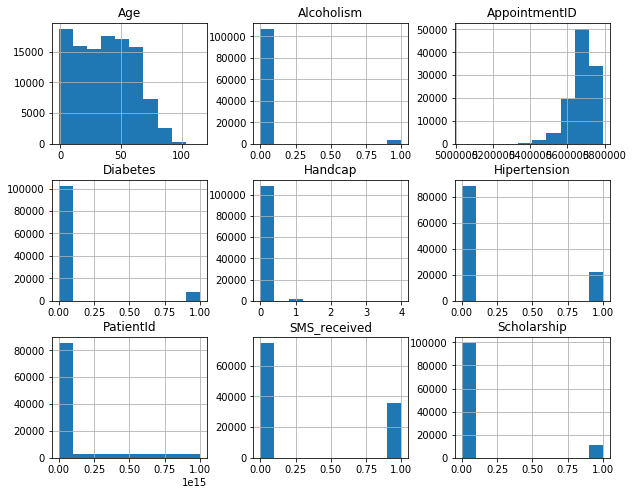

In [ ]:
df_noshow.info()
df_noshow.hist(figsize=(10,8)); #Using a histogram chart to check each feature in the distribution

From the features of this dataset, there are 14 Columns and 110527 Rows; there are also inconsistencies like typographical errors, outliers, and wrong Datatypes. This will be cleaned for wrangling.


### Data Cleaning


In [ ]:
#Correcting Incosistencies in Data, using pandas rename
df_noshow.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap', 'SMS_received': 'SmsReceived', 'No-show': 'Noshow'}, inplace = True)

In [ ]:
#  Checking for null valvues.
df_noshow.info() #There are no null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SmsReceived       110527 non-null int64
Noshow            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
# Dropping 'PatientId' and 'AppointmentID' as it wont be needed for this investigation.
df_noshow.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

Next is the datatypes for the column will be addressed: ScheduledDay, AppointmentDay. Changing datatype and creating a new feature for analysis #WaitingDays

In [ ]:
## Converting Schedule and AppiontmentDay in string to datetime type using pandas date time
df_noshow['ScheduledDay'] = pd.to_datetime(df_noshow.ScheduledDay)
df_noshow['AppointmentDay'] = pd.to_datetime(df_noshow.AppointmentDay)
df_noshow.AppointmentDay = df_noshow.AppointmentDay.apply(np.datetime64) #using numpy to convert to time delta
df_noshow.ScheduledDay = df_noshow.ScheduledDay.apply(np.datetime64)
df_noshow['WaitingDays'] = df_noshow['AppointmentDay'] - df_noshow['ScheduledDay']
df_noshow.WaitingDays = df_noshow.WaitingDays.apply(abs)
df_noshow['WaitingDays'] = df_noshow.WaitingDays.dt.days #Extracting just the day value from the full "timedelta"  converting to int.


In [ ]:
df_noshow.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Noshow,WaitingDays
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [ ]:
# Checking for Unique Values in each column
print("Gender = {}".format(df_noshow.Gender.unique()))
print("Scholarship = {}".format(df_noshow.Scholarship.unique()))
print("Hypertension = {}".format(df_noshow.Hypertension.unique()))
print("Diabetes = {}".format(df_noshow.Diabetes.unique()))
print("Alcoholism = {}".format(df_noshow.Alcoholism.unique()))
print("Handicap = {}".format(df_noshow.Handicap.unique()))
print("SmsReceived = {}".format(df_noshow.SmsReceived.unique()))
#print("Age = {}".format(df_noshow.Age.unique()))
print('WaitingDays =',sorted(df_noshow.WaitingDays.unique()))
print('Age =',sorted(df_noshow.Age.unique()))

Gender = ['F' 'M']
Scholarship = [0 1]
Hypertension = [1 0]
Diabetes = [0 1]
Alcoholism = [0 1]
Handicap = [0 1 2 3 4]
SmsReceived = [0 1]
WaitingDays = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 114, 116, 118, 121, 122, 124, 125, 126, 131, 132, 138, 141, 145, 150, 154, 161, 168, 175, 178]
Age = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 7

In [ ]:
#Removing the outlier displayed in the histogram (-1 year)
df_noshow[df_noshow['Age']<0]

df_noshow = df_noshow[(df_noshow.Age >= 0)]
df_noshow.shape #with the column 13 then 

(110526, 13)

**Bulding functions to avoid repeated codes**

In [ ]:
#building plot function
def plt_bar(df_noshow, xvar, normalize=True, rot=0, kind='bar', figsize=(16,6), log=False):
   df_noshow['Noshow'].groupby(df_noshow[xvar]).value_counts(normalize=normalize).unstack('Noshow').plot(kind=kind, rot=rot, width=0.8, figsize=figsize, log=log, edgecolor='black')
    # Adding title and formatting it
   plt.title("Show or Noshow up for Appointments based on {}".format(xvar).title(), fontsize = 14)
    # Adding the x label and formatting it
   plt.xlabel(xvar.title(),fontsize = 8, weight = "bold")
    # Adding the y label and formatting it
   plt.ylabel("Frequency".title(),fontsize = 8, weight = "bold")

In [ ]:
#building a function for probability of showing up per variable
def probShowup(group_by):
    rows = []
    for item in group_by:
        for level in df_noshow[item].unique():
            row = {'Feature': item}
            total = len(df_noshow[df_noshow[item] == level]) 
            n = len(df_noshow[(df_noshow[item] == level) & (df_noshow.Noshow == 'No')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the Relationship between the Features like Schorlarship, Age and Disease (Hypertension) of each patient in determining a patient shows up?)

In [ ]:
df_noshow.head() #loading the dataset

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,Noshow,WaitingDays
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [ ]:
df_noshow.describe() #generating statistical results for each feature

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,WaitingDays
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,9.532915
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15.027724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


What is the number of unique patients with NoShow(YES/NO) for their appiontments? 

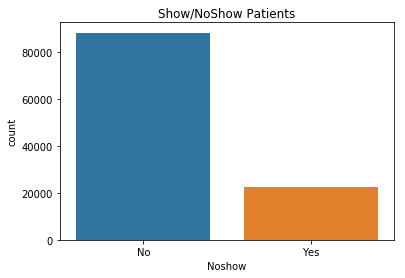

In [ ]:
## Counting Noshow (Yes/No)
df_noshow.Noshow.value_counts()
ax = sns.countplot(x=df_noshow.Noshow, data=df_noshow)
ax.set_title("Show/NoShow Patients") #Where Show is No and NoShow is Yes
plt.show()

From the dataset around 85,000 patients show up for appointments while up to 22,500 dont.

**Gender** In the viz below, the F is Female and M is Male

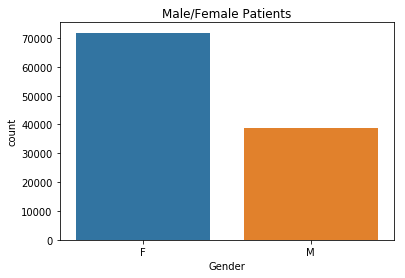

In [ ]:
#Counting Gender (No of Male and Female patients)
df_noshow.Gender.value_counts()
ax = sns.countplot(x=df_noshow.Gender, data=df_noshow)
ax.set_title("Male/Female Patients")
plt.show()

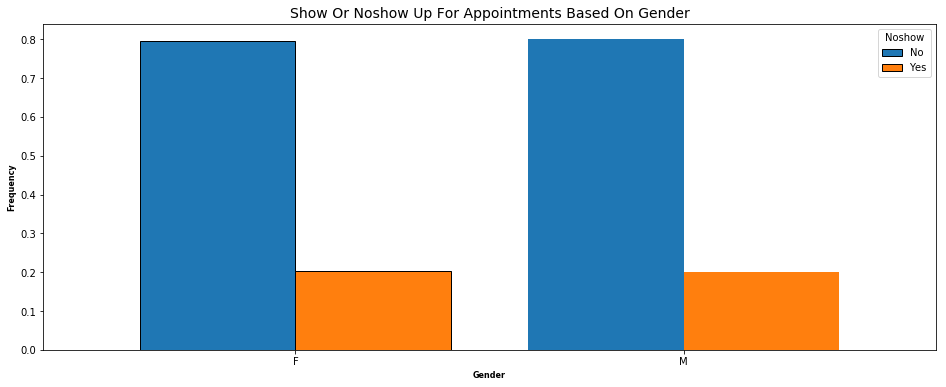

In [ ]:
plt_bar(df_noshow,'Gender') #where F is Female and M is Male

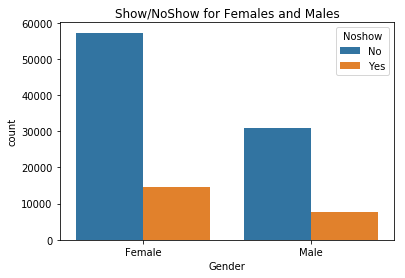

In [ ]:
#Relationship beteween the  Gender and Noshow appiontments(Yes/No)
plot = sns.countplot(x=df_noshow.Gender, hue=df_noshow.Noshow, data=df_noshow)
plot.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
plot.set_xticklabels(x_ticks_labels)
plt.show()

The Gender visualizations above show that the patients are predominatly female and about 78,000 show up for appointment. For male 40,000 show up for appiontment while less than 10,000 dont.

**Age**

In [ ]:
df_noshow.Age.describe() #The average age of the paients is mean 37years

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

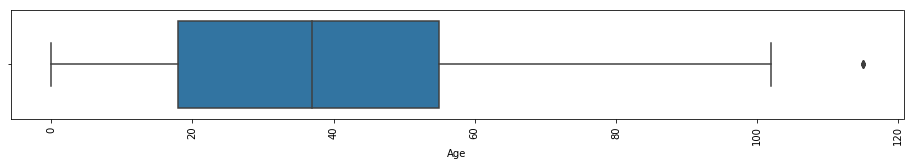

In [ ]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
Age = sns.boxplot(x=df_noshow.Age) #There seem to be another outlier Age = 115 but doesnt have a visible effect on dataset

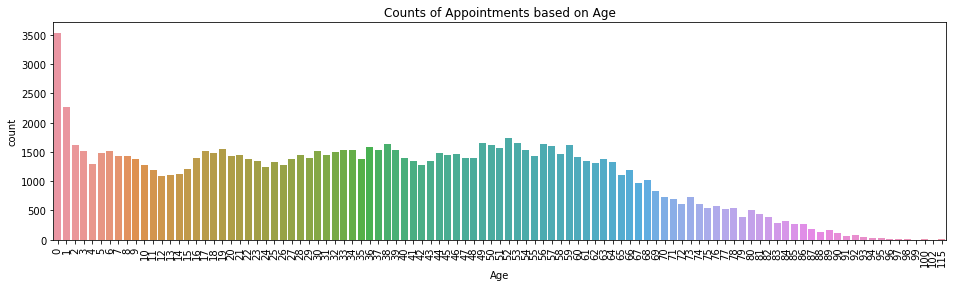

In [ ]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_noshow.Age)
ax.set_title("Counts of Appointments based on Age")
plt.show()

The above Histogram plot shows that there are peaks for Children and then the distribution starts to be uniform. After which the Age of 60 years. The distribution is rightly-skewed.

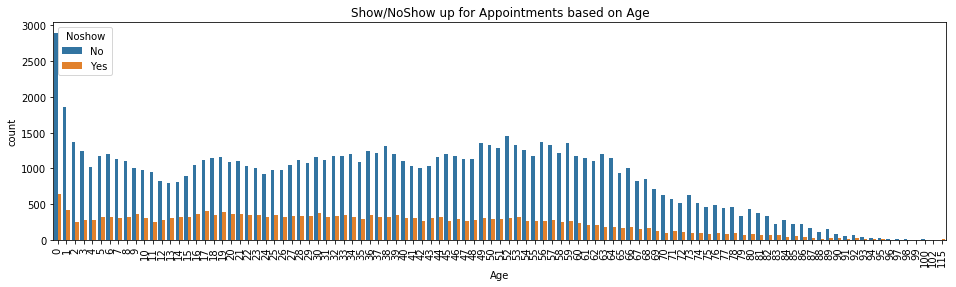

In [ ]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_noshow.Age, hue=df_noshow.Noshow)
ax.set_title("Show/NoShow up for Appointments based on Age")
plt.show()

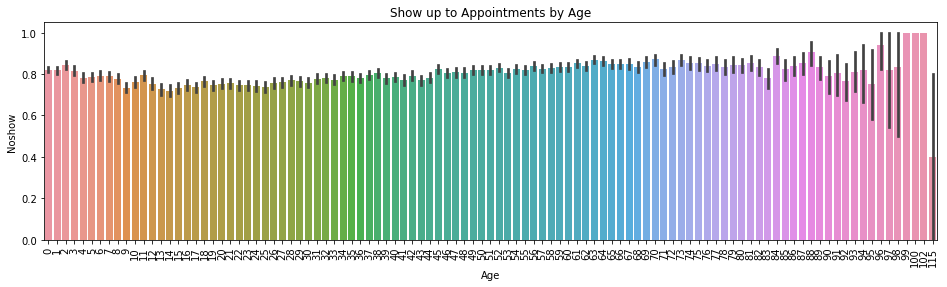

In [ ]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_noshow.Age, y=df_noshow.Noshow =='No')
ax.set_title("Show up to Appointments by Age")
plt.show()

In [ ]:
# Convert Age into Age Groups 
bins = [0, 18, 37, 55, 115]
labels = ['Child','Teen','Adult','Senior']
df_noshow['Age_Group'] = pd.cut(df_noshow['Age'], bins=bins, labels=labels, include_lowest= True, right= False)

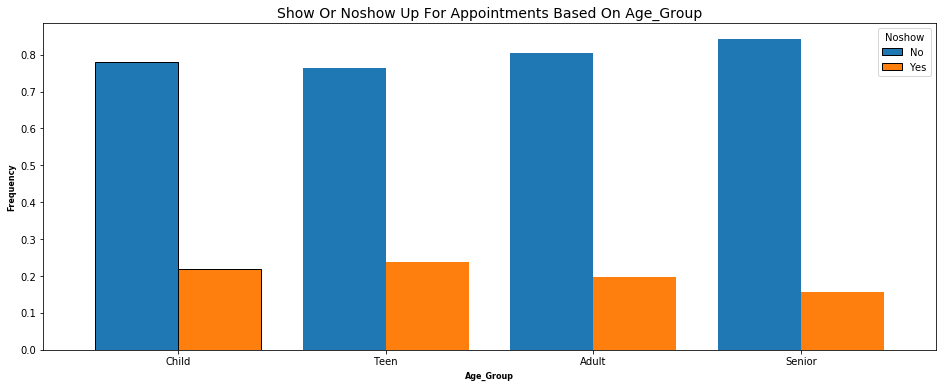

In [ ]:
# Check the Show/No Show for Age variable (after normalizing the numbers)
plt_bar(df_noshow, 'Age_Group');  #where the No is showing up and  and Yes is not showing up

From the visualisations above the Age distribution shows that patients from 55 years upwards tend to show up for their appiontments. So the age distribution can help to determine if the patient will show up or not.

From the visualizations the age group patients have around 80% Show up rate.

**Scholarship**: In this viz, 0 is No Schorlarship and 1 is Schorlarship

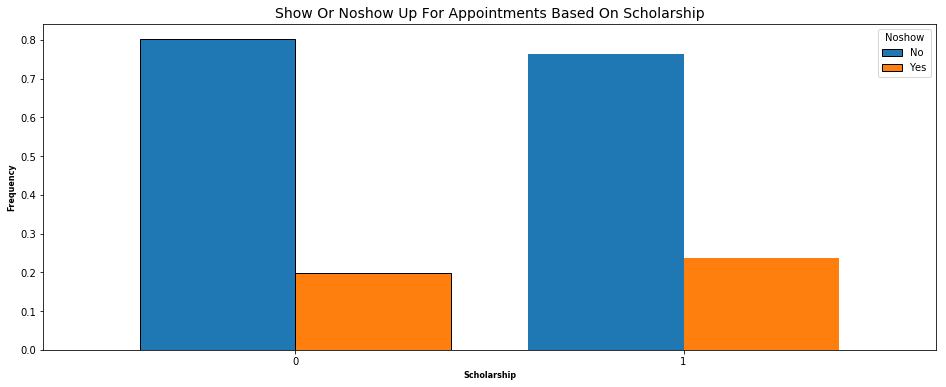

In [ ]:
plt_bar(df_noshow,'Scholarship') #Show or NOShow Up 

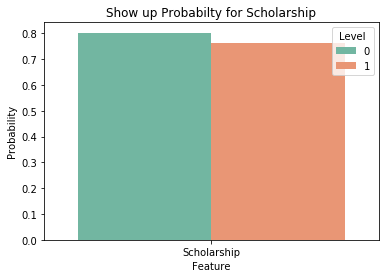

In [ ]:
ax=sns.barplot(data = probShowup(['Scholarship']),
            x = 'Feature', y = 'Probability', hue = 'Level', palette="Set2")
ax.set_title("Show up Probabilty for Scholarship");

Out of almost 100,000 patients without Scholarship and out of them around 80% have come for the visit.
Out of the 10,500 patients with Scholarship around 75% of them showed up for their appiontment.
The scholarship feature could help in determining if a patient will come for the visit after an scheduling.

**Hypertension** In this Viz, 0 is No Hypertension and 1 is Hypertension

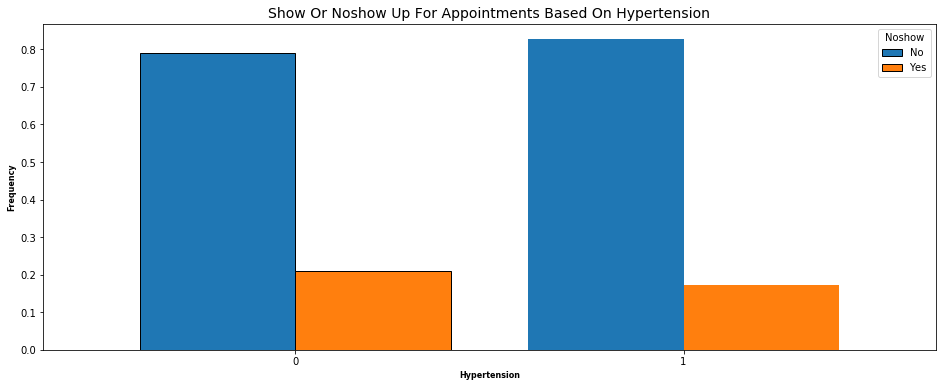

In [ ]:
#Data Visualization for Show/NoShow up Probability
plt_bar(df_noshow,'Hypertension') 

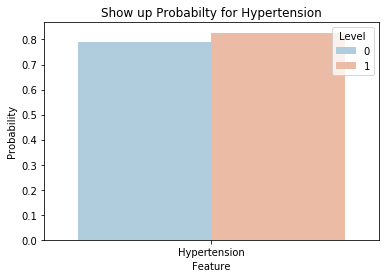

In [ ]:
#Data Visualization for Show up Probability where 0 = No Hypertension and 1 = Hypertensionn
ax=sns.barplot(data = probShowup(['Hypertension']),
            x = 'Feature', y = 'Probability', hue = 'Level', palette="RdBu_r")
ax.set_title("Show up Probabilty for Hypertension");

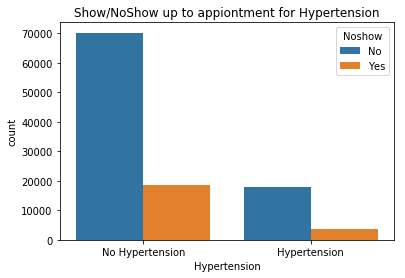

In [ ]:
ax = sns.countplot(x=df_noshow.Hypertension, hue=df_noshow.Noshow, data=df_noshow)
ax.set_title("Show/NoShow up to appiontment for Hypertension")
x_ticks_labels=['No Hypertension','Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the visualizations on Hypertension, we can see that around 100,000 patients are without Hypertension and out of them around 70% have come for the visit.
Out of the 22,000 patients with Hypertension around 80% of them have come for the visit. Hypertension can help determine if a patient will show up.

### Research Question 2  (Does the average waiting time between the scheduling date and the appointment date affect the ability of the patient showing up for their appiontment?!)

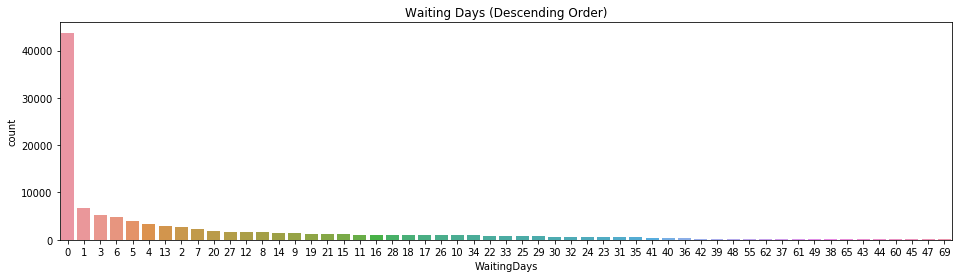

In [ ]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df_noshow.WaitingDays, order=df_noshow.WaitingDays.value_counts().iloc[:55].index)
ax.set_title("Waiting Days (Descending Order)")
plt.show()

The visualization above shows most of the appiontments booked by patients are on the same day. The highest number of waiting days are 1 day, 3 days, 6 days.

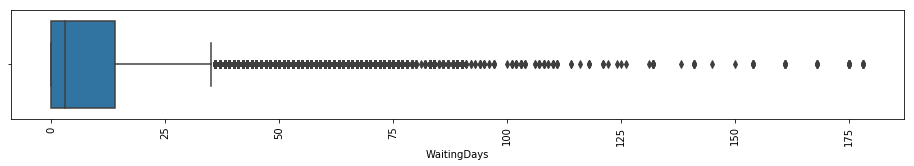

In [ ]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
WaitingDays = sns.boxplot(x=df_noshow.WaitingDays) #Visualizing box plot data for Waiting Days

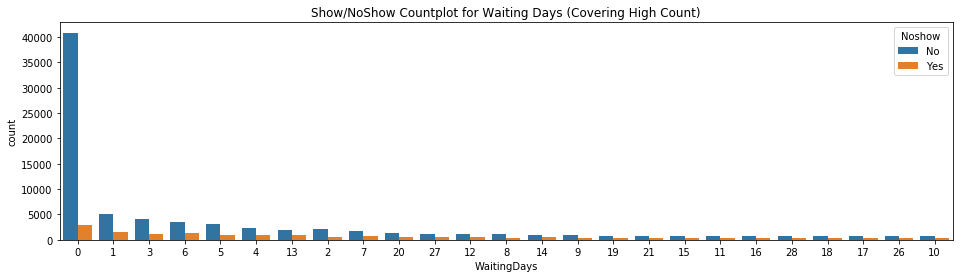

In [ ]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df_noshow.WaitingDays, hue=df_noshow.Noshow, order=df_noshow.WaitingDays.value_counts().iloc[:25].index)
ax.set_title("Show/NoShow Countplot for Waiting Days (Covering High Count)")
plt.show()

From the visualization above, the lower the waiting days the higher the probabilty of the patient showing up for their appiontment.

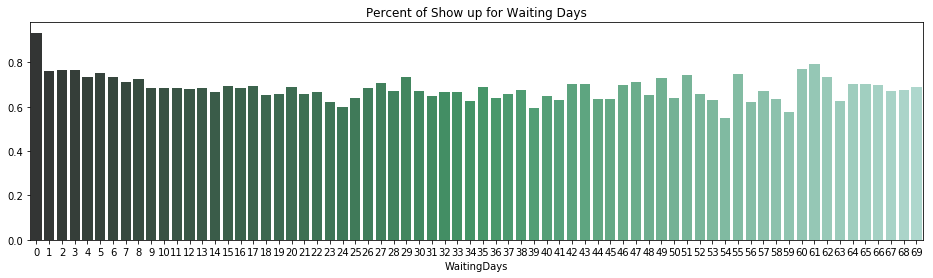

In [ ]:
#Visualizing the Waiting Days for Show up Appiontments

df_w_ratio = df_noshow[df_noshow.Noshow == 'No'].groupby(['WaitingDays']).size()/df_noshow.groupby(['WaitingDays']).size()

plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=df_noshow.WaitingDays.iloc[:70].index, palette="BuGn_d")
ax.set_title("Percent of Show up for Waiting Days")
plt.show()

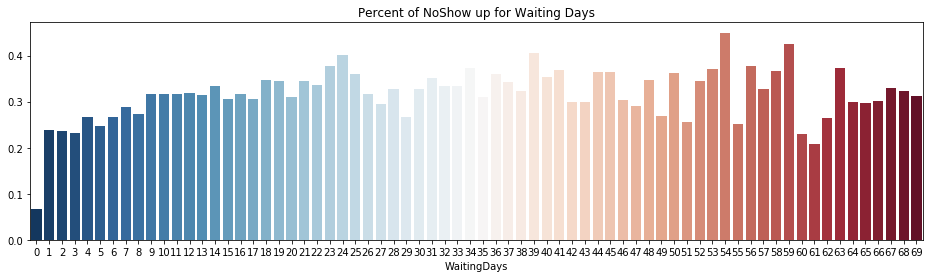

In [ ]:
#Visualizing the Waiting Days for NoShow
df_w_ratio = df_noshow[df_noshow.Noshow == 'Yes'].groupby(['WaitingDays']).size()/df_noshow.groupby(['WaitingDays']).size()

plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=df_noshow.WaitingDays.iloc[:70].index, palette="RdBu_r")
ax.set_title("Percent of NoShow up for Waiting Days")
plt.show()

The barplot above shows a distribution of Waiting days of patients that dont show up for their appiontments. Appiontment days longer than 37, increases the possibiity of the patient not showing up.

#### <a id='conclusions'></a>
## Conclusions

> **The data exploration presented in this analysis, was to show up some insights on the possible causes of patients missing their appointments. It is important to note, though, that the provided data cannot affirm any statement with statistical validity or causal relations.**

**Age** of the patient shows a dependency to patients show up for appiontment is observed with respect to Age. Babies and children between age 0-10 and Older patients from 55- 78 years show up more for their appiontment. 

In respect to **Schorlarship**; it seems having no health benefits from the government doesnt really affect the patient show/no show for an appiontment.

However patients with **Hypertension** tend to show up for their appiontments; infering an average 0.071865 of the patients with this disease show up.

**Waiting Days** data cannot be conclusively stated to be a good predictors of patients Show up/No show up Status, since majority of the patients book their appiontment between 0-5 days. 

95% of the patients who have booked their appointments on the same day, visit the hospital for their appiontment. Also up to 80% of the patients are visiting the hospital if they booked their appointments just before 5 days.

However it was noted that the longer the Waiting Days the higher the chances of the patient not showing up for their appiontment.

Limitations:

- The annonymity of the patient id does not make it easily used for wrangling
- There is no clear description of how the data was collated
- Some of the features require additional data to understand how the data was gotten like Scholarship i.e how does a patient qualifies for a scholarship.

## References

> https://stackoverflow.com/questions/20868394/changing-a-specific-column-name-in-pandas-dataframe

> https://www.w3schools.com/python/ref_func_abs.asp

> https://www.kaggle.com/code/samratp/predict-show-noshow-eda-visualization-model

> https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

> https://hub.packtpub.com/python-functions-avoid-repeating-code/

> https://www.kaggle.com/code/somrikbanerjee/predicting-show-up-no-show


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0